In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Визначте основні параметри
IMG_SIZE = 150
BATCH_SIZE = 32
NUM_CLASSES = 6 
DATA_DIR_TRAIN = r"C:\Users\Nuts1k\Downloads\archive\seg_train\seg_train"
DATA_DIR_TEST = r"C:\Users\Nuts1k\Downloads\archive\seg_test\seg_test"

# Створюємо генератори даних
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR_TRAIN,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical' # 
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR_TEST,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
print(f"Знайдено класи: {class_names}")

# Нормалізація
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Знайдено класи: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_simple = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)), # 3 = RGB кольори
    
    # Блок 1
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Блок 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Блок 3 (опціонально, але рекомендовано)
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Класифікатор
    Flatten(), 
    Dense(512, activation='relu'),
    Dropout(0.5), 
    Dense(NUM_CLASSES, activation='softmax') 
])

model_simple.summary()

# Компіляція
model_simple.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Навчання
history_simple = model_simple.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 107s 241ms/step - accuracy: 0.6370 - loss: 0.9487 - val_accuracy: 0.7210 - val_loss: 0.7312
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 203ms/step - accuracy: 0.7670 - loss: 0.6388 - val_accuracy: 0.7393 - val_loss: 0.7296
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 202ms/step - accuracy: 0.8152 - loss: 0.5112 - val_accuracy: 0.8057 - val_loss: 0.5603
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.8620 - loss: 0.3872 - val_accuracy: 0.8347 - val_loss: 0.5213
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.8932 - loss: 0.2977 - val_accuracy: 0.8370 - val_loss: 0.5391
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 88s 200ms/step - accuracy: 0.9178 - loss: 0.2312 - val_accuracy: 0.8347 - val_loss: 0.5899
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 203ms/step - accuracy: 0.9396 - loss: 0.1746 - val_accuracy: 0.8367 - val_loss: 0.6912
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 198ms/step - accuracy: 0.9562 - loss: 

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# 1. Завантажуємо VGG16 без верхнього класифікатора
base_model = VGG16(
    weights='imagenet',
    include_top=False,  
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False

# Створюємо власний класифікатор
x = base_model.output
x = Flatten()(x) 
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(NUM_CLASSES, activation='softmax')(x)

model_transfer = Model(inputs=base_model.input, outputs=output_layer)
model_transfer.summary()

model_transfer.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Навчання 
history_transfer = model_transfer.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,813,638 (64.14 MB)

 Trainable params: 2,098,950 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 452s 1s/step - accuracy: 0.7930 - loss: 0.5521 - val_accuracy: 0.8647 - val_loss: 0.3647
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 434s 988ms/step - accuracy: 0.8521 - loss: 0.4042 - val_accuracy: 0.8533 - val_loss: 0.3628
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 433s 986ms/step - accuracy: 0.8695 - loss: 0.3545 - val_accuracy: 0.8730 - val_loss: 0.3363
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 442s 986ms/step - accuracy: 0.8834 - loss: 0.3156 - val_accuracy: 0.8717 - val_loss: 0.3361
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 433s 986ms/step - accuracy: 0.8885 - loss: 0.2932 - val_accuracy: 0.8807 - val_loss: 0.3221
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 433s 986ms/step - accuracy: 0.8935 - loss: 0.2831 - val_accuracy: 0.8700 - val_loss: 0.3595
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 434s 988ms/step - accuracy: 0.9030 - loss: 0.2642 - val_accuracy: 0.8747 - val_loss: 0.3410
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 0.9030 - loss:


--- Завдання 2.в) Порівняння результатів ---

Фінальна точність (Val Accuracy):
  Проста CNN (з нуля):     0.8197
  Transfer Learning (VGG16): 0.8777

Фінальні втрати (Val Loss):
  Проста CNN (з нуля):     1.1427
  Transfer Learning (VGG16): 0.3571


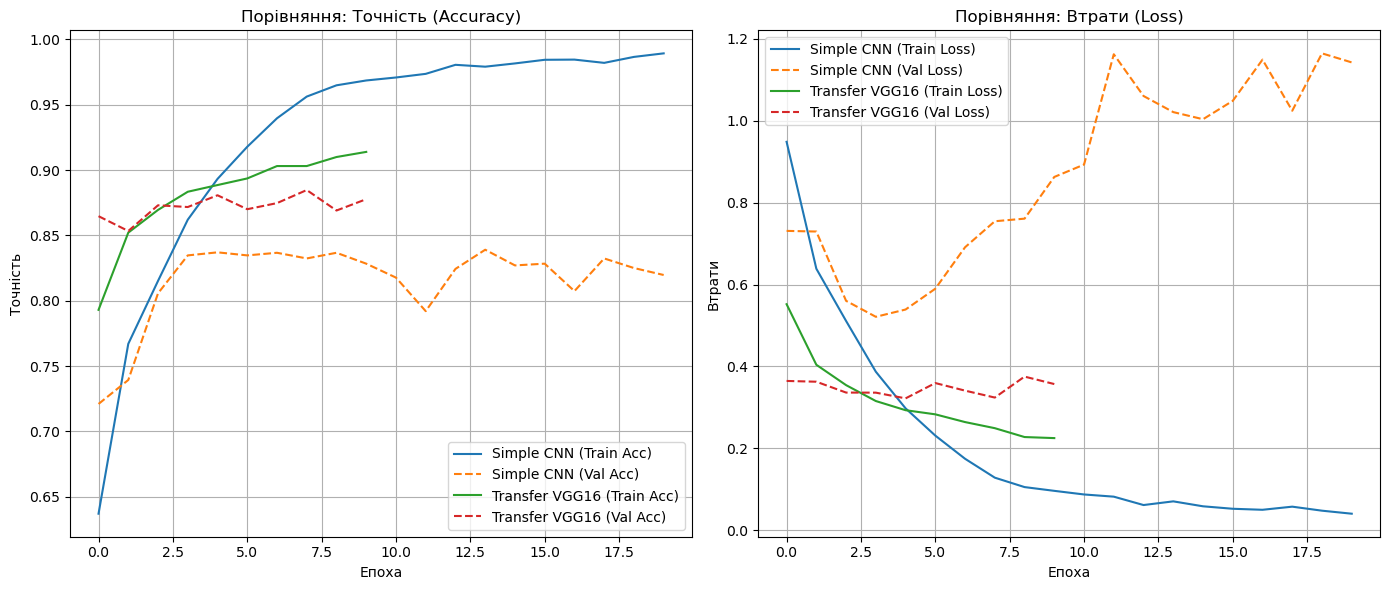

In [12]:
import matplotlib.pyplot as plt

try:
    acc_simple = history_simple.history['val_accuracy'][-1]
    acc_transfer = history_transfer.history['val_accuracy'][-1]

    loss_simple = history_simple.history['val_loss'][-1]
    loss_transfer = history_transfer.history['val_loss'][-1]

    print(f"\nФінальна точність (Val Accuracy):")
    print(f"  Проста CNN (з нуля):     {acc_simple:.4f}")
    print(f"  Transfer Learning (VGG16): {acc_transfer:.4f}")

    print(f"\nФінальні втрати (Val Loss):")
    print(f"  Проста CNN (з нуля):     {loss_simple:.4f}")
    print(f"  Transfer Learning (VGG16): {loss_transfer:.4f}")

# Графік Точності
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history_simple.history['accuracy'], label='Simple CNN (Train Acc)')
    plt.plot(history_simple.history['val_accuracy'], label='Simple CNN (Val Acc)', linestyle='--')
    plt.plot(history_transfer.history['accuracy'], label='Transfer VGG16 (Train Acc)')
    plt.plot(history_transfer.history['val_accuracy'], label='Transfer VGG16 (Val Acc)', linestyle='--')
    plt.title('Порівняння: Точність (Accuracy)')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()
    plt.grid(True)

# Графік Втрат
    plt.subplot(1, 2, 2)
    plt.plot(history_simple.history['loss'], label='Simple CNN (Train Loss)')
    plt.plot(history_simple.history['val_loss'], label='Simple CNN (Val Loss)', linestyle='--')
    plt.plot(history_transfer.history['loss'], label='Transfer VGG16 (Train Loss)')
    plt.plot(history_transfer.history['val_loss'], label='Transfer VGG16 (Val Loss)', linestyle='--')
    plt.title('Порівняння: Втрати (Loss)')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()